In [1]:
from neurons import Model,Layer
import numpy as np
import gc
from activation_function import leaky_relu,softmax,d_leaky_relu

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder as ohe
X = load_iris().data
y = load_iris().target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_ohe = ohe(handle_unknown='ignore', sparse_output=False).fit_transform(y.reshape(-1,1))

In [11]:
import matplotlib.pyplot as  plt
def train_and_plot_diff_model_history(X , y, units_per_layer = 3,num_h_layers=1,epochs=10,verbose=0):
    input_size,output_size = len(X[0]) , len(y[0])
    model = Model(learning_rate=0.01)
    
    # input layers
    model.add(layer=Layer(units=units_per_layer,
                          input_size=input_size,
                          activation_function=leaky_relu))

    #hidden layers
    for i in range(0,num_h_layers):
        model.add(layer=Layer(units=units_per_layer,
                              input_size=units_per_layer,
                              activation_function=leaky_relu))
    
    # Output Layers
    model.add(layer=Layer(units=output_size,
                          input_size=units_per_layer,
                          activation_function=softmax)) 
    model.fit(X, y, epochs=15, batch_size=8,verbose = verbose)
    # print(f"Model : {model}")
    history = model.history()
    return history

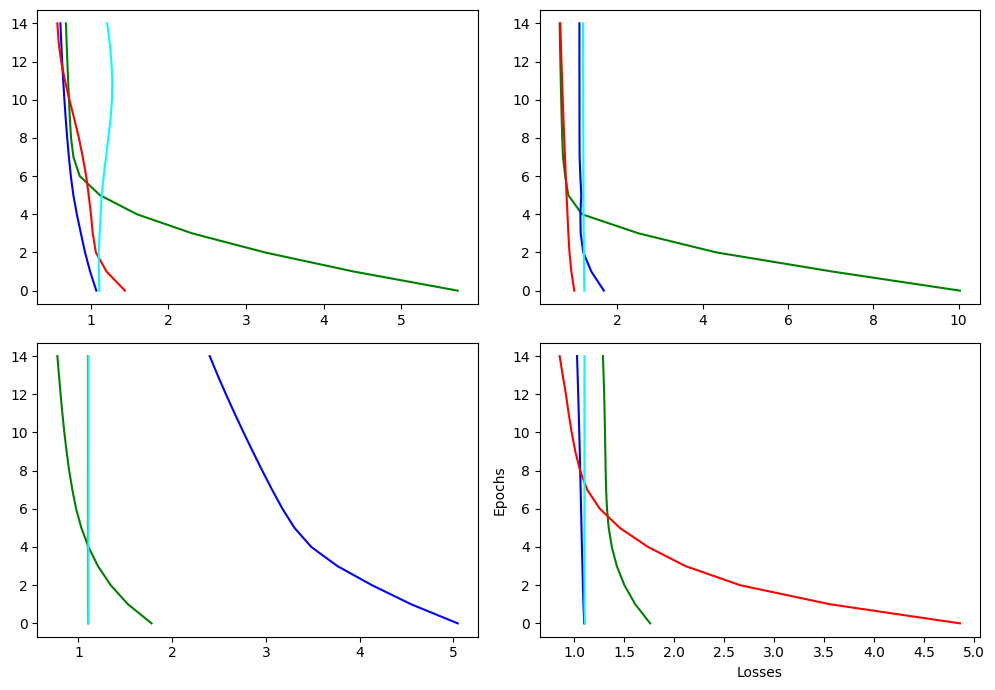

In [33]:

fig, axs = plt.subplots(2, 2, figsize=(10, 7))
plt.xlabel("Losses")
plt.ylabel("Epochs")
STATE = 100
for i, ax in enumerate(axs.flat):
    np.random.seed(i+STATE)
    history1 = train_and_plot_diff_model_history(X,y_ohe,verbose=0)
    history2 = train_and_plot_diff_model_history(X,y_ohe,units_per_layer=4,verbose=0)
    history3 = train_and_plot_diff_model_history(X,y_ohe,units_per_layer=4,num_h_layers=2,verbose=0)
    history4 = train_and_plot_diff_model_history(X,y_ohe,units_per_layer=4,num_h_layers=5,verbose=0)
    ax.plot(history1.values(),np.arange(0,len(history1)) ,color='green')
    ax.plot(history2.values(),np.arange(0,len(history2)) ,color='blue')
    ax.plot(history3.values(),np.arange(0,len(history3)) ,color='red')
    ax.plot(history4.values(),np.arange(0,len(history4)) ,color='cyan')
fig.tight_layout()
plt.show()

In [28]:
gc.collect()


26406

# Using the Best Found Solution For simulating a real world situation:

In [38]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.model_selection import train_test_split

from activation_function import leaky_relu,softmax,d_leaky_relu
import numpy as np
from neurons import Model,Layer
import gc

np.random.seed(42)
X = load_iris().data
y = load_iris().target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
encoder = ohe(handle_unknown='ignore', sparse_output=False)
y_ohe = encoder.fit_transform(y.reshape(-1,1))

X_train ,X_test,y_train, y_test = train_test_split(X_scaled,y_ohe,stratify = y_ohe) # Using Default 0.2 split
X_train.shape ,X_test.shape,y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

In [39]:
input_size,output_size = len(X_train[0]) , len(y_train[0])
model = Model(learning_rate=0.01)
model.add(layer=Layer(units=3,
                          input_size=input_size,
                          activation_function=leaky_relu))
model.add(layer=Layer(units=3,
                      input_size=3,
                      activation_function=leaky_relu))
model.add(layer=Layer(units=output_size,
                          input_size=3,
                          activation_function=softmax)) 
model.fit(X_train,y_train,epochs = 10)

Epoch 0, Loss: 1.0562
Epoch 1, Loss: 0.9049
Epoch 2, Loss: 0.8246
Epoch 3, Loss: 0.7649
Epoch 4, Loss: 0.7111
Epoch 5, Loss: 0.6657
Epoch 6, Loss: 0.6291
Epoch 7, Loss: 0.5988
Epoch 8, Loss: 0.5738
Epoch 9, Loss: 0.5524


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_ohe = model.predict(X_test)
y_pred = np.argmax(y_pred_ohe, axis=1)
y_true = encoder.inverse_transform(y_test).reshape(1,-1)[0]

In [41]:
print("Classification Report:")
print(classification_report(y_true, y_pred, zero_division=0))

cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

accuracy = accuracy_score(y_true, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.69      0.82        13
           2       0.75      1.00      0.86        12

    accuracy                           0.89        38
   macro avg       0.92      0.90      0.89        38
weighted avg       0.92      0.89      0.89        38


Confusion Matrix:
[[13  0  0]
 [ 0  9  4]
 [ 0  0 12]]

Accuracy: 0.8947
